# Credit card fraud detection using Neural Networks

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skew
import random
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef,make_scorer, roc_auc_score, roc_curve,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model



Dataset is obtained from kaggle (https://www.kaggle.com/datasets/kartik2112/fraud-detection). EDA and preprocessing are same as of ML models

In [4]:
df_main = pd.read_csv('creditcardfraud.csv')
df_main.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [14]:
df_main.shape

(1852394, 23)

## EDA and Pre-Processing

In [16]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [15]:
df_main.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

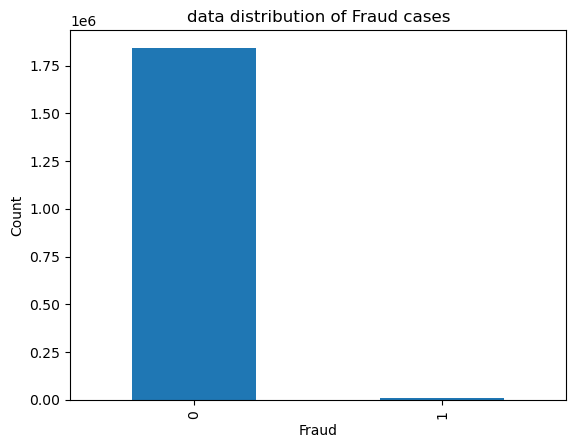

In [21]:
class_counts = df_main['is_fraud'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('data distribution of Fraud cases')
plt.show()

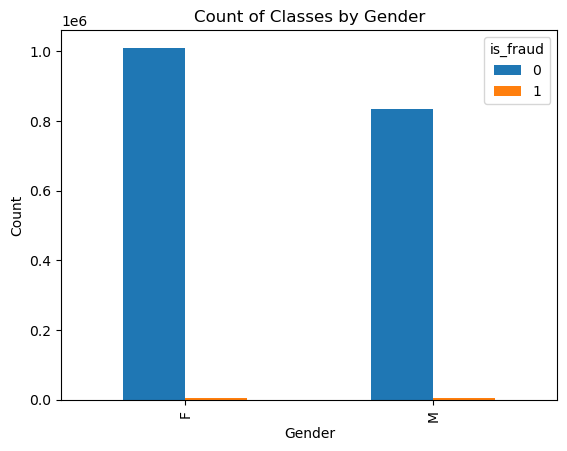

In [24]:
class_counts = df_main.groupby('gender')['is_fraud'].value_counts()

class_counts = class_counts.unstack()

class_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Classes by Gender')
plt.show()

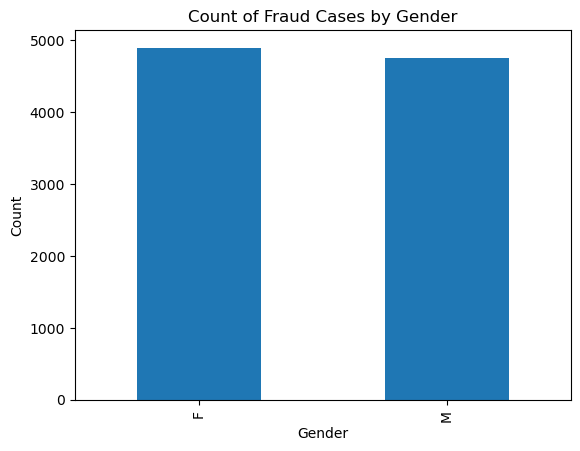

In [26]:
fraud_df = df_main[df_main['is_fraud'] == 1]
fraud_counts = fraud_df['gender'].value_counts()
fraud_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Fraud Cases by Gender')
plt.show()

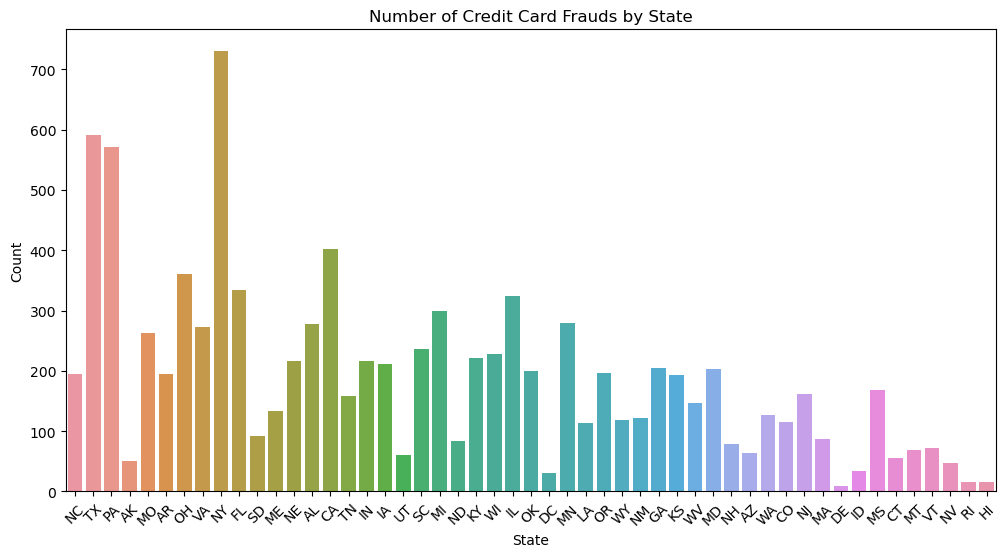

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=fraud_df['state'], ax=ax)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Number of Credit Card Frauds by State')
plt.show()

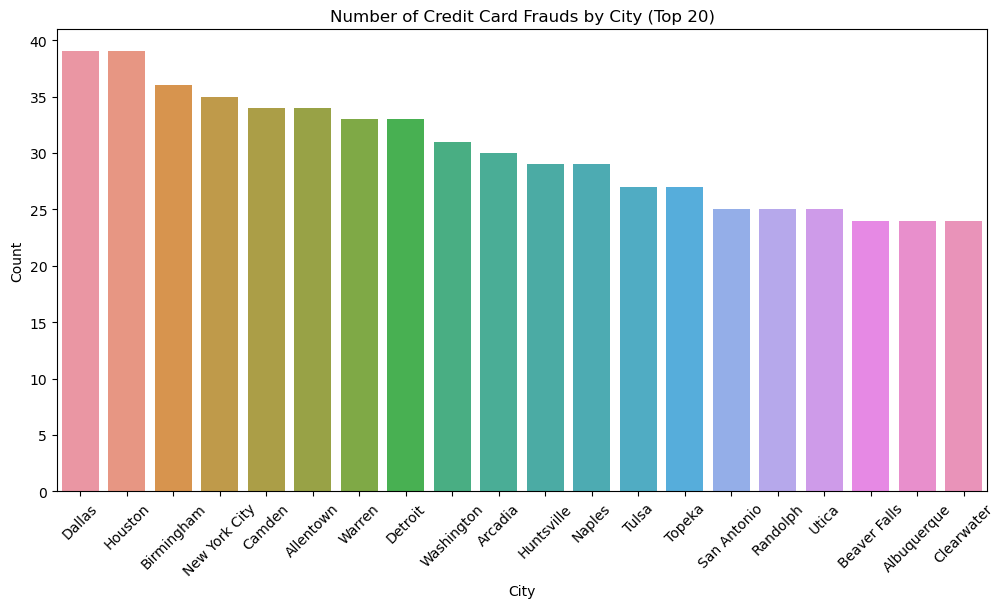

In [30]:
city_counts = fraud_df['city'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=fraud_df['city'], order=city_counts.index, ax=ax)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Number of Credit Card Frauds by City (Top 20)')
plt.show()

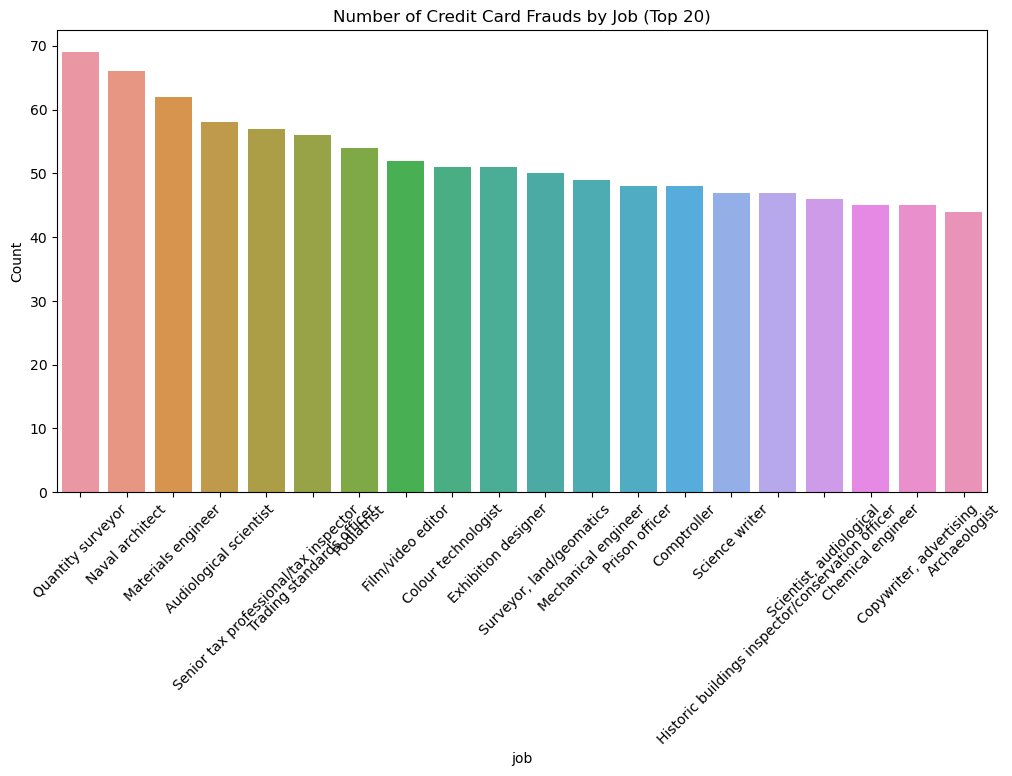

In [32]:
city_counts = fraud_df['job'].value_counts().head(20)
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=fraud_df['job'], order=city_counts.index, ax=ax)
plt.xticks(rotation=45)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Number of Credit Card Frauds by Job (Top 20)')
plt.show()

In [5]:
df_main.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df_main['trans_date_trans_time']=pd.to_datetime(df_main['trans_date_trans_time'])
df_main['trans_date']=df_main['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_main['trans_date']=pd.to_datetime(df_main['trans_date'])
df_main['dob']=pd.to_datetime(df_main['dob'])

In [37]:
df_main.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 393          Orient  ... -118.2105       149   
2      594 White Dale Suite 530      Malad City  ... -112.2620      4154   
3   9443 Cynthia Court Apt. 038         Boulder  ... -112.1138      1939   
4              408 Bradley Rest        Doe Hill  ...  -79.4629        99   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_date  
0         0  2019-01-01  
1         0  2019-01-01  
2         0  2019-01-01  
3         0  2019-01-01  
4         0  2019-01-01  

[5 rows x 23 columns]

C:\Users\anizy\AppData\Local\Temp\ipykernel_2480\376312438.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


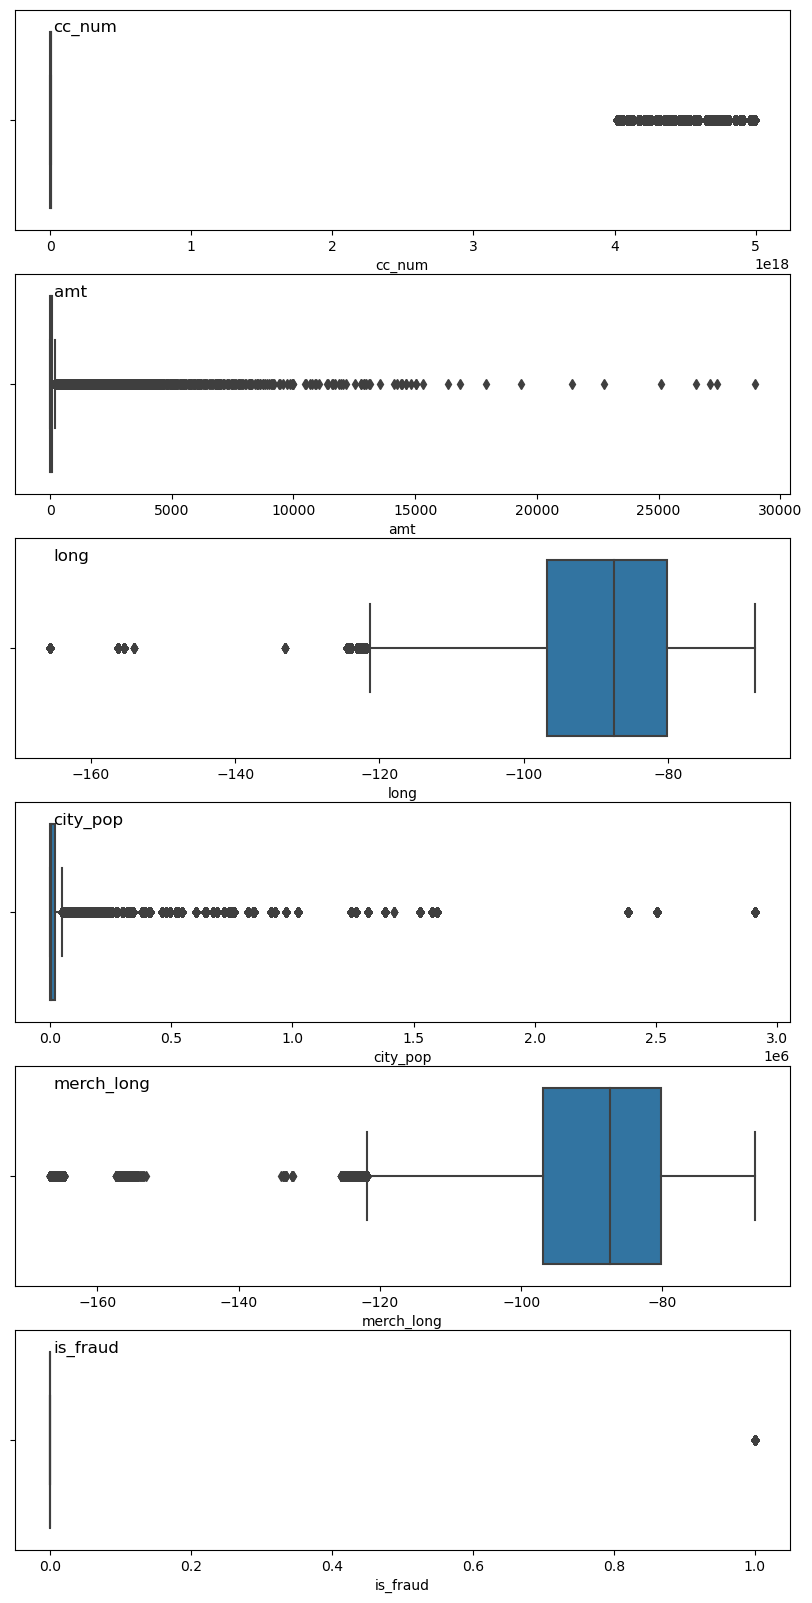

In [40]:
def get_skewed_cols(df, threshold=1):
    skewness = df.skew()
    return skewness[(skewness > threshold) | (skewness < -threshold)].index.tolist()

skewed_cols =get_skewed_cols(df_main)

fig, axes = plt.subplots(nrows=len(skewed_cols), ncols=1, figsize=(10, 20))
for i, col in enumerate(skewed_cols):
    sns.boxplot(x=df_main[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].text(0.05, 0.95, col, transform=axes[i].transAxes,fontsize=12, va='top')
plt.show()

C:\Users\anizy\AppData\Local\Temp\ipykernel_2480\1358073649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_main.corr()


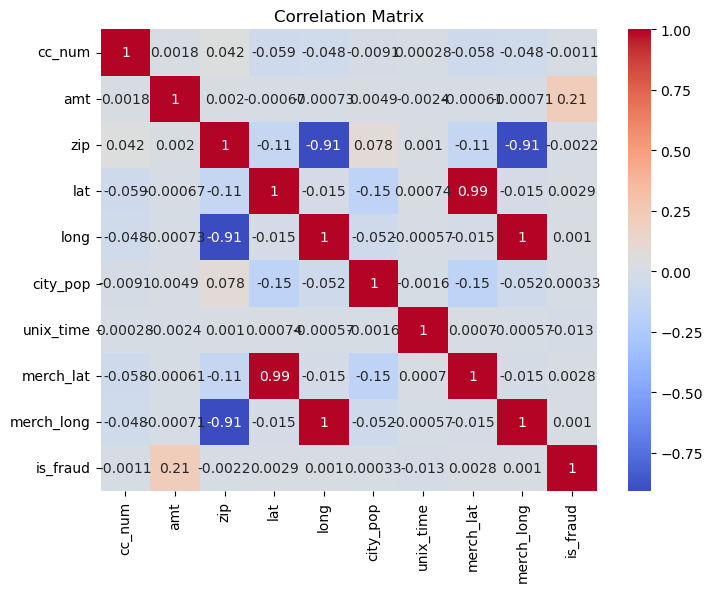

In [41]:
correlation_matrix = df_main.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
df_main.gender=df_main.gender.apply(lambda x: 1 if x=="M" else 0)
df_main.gender.value_counts()

0    1014749
1     837645
Name: gender, dtype: int64

In [8]:
#dropping highly correlated columns
drop_cols = ['merch_lat','merch_long','zip']
df_main=df_main.drop(drop_cols,axis=1)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 int64         
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  lat                    float64       
 12  long                   float64       
 13  city_pop               int64         
 14  job                    object        
 15  dob                    datetime64[ns]
 16  trans_num              object        
 17  unix_time              int64         
 18  is_fraud              

In [9]:
#To avoid dtype mismatch, convert the datetime into compatible type, and drop the conflicting ones, thereby preserving the info but removing the conflicts. Also removing columns not contributing to the model much
df_main['tr_month'] = pd.DatetimeIndex(df_main['trans_date']).month
df_main['tr_year'] = pd.DatetimeIndex(df_main['trans_date']).year
df_main.drop(['trans_date_trans_time','trans_date','dob','cc_num','merchant','first','last','street','trans_num','unix_time','city','state','job'],axis=1,inplace=True)

In [10]:
#convert the categorical data as columns 
df_main = pd.get_dummies(df_main,columns=['category'],drop_first=True)

In [11]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 21 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   amt                      float64
 1   gender                   int64  
 2   lat                      float64
 3   long                     float64
 4   city_pop                 int64  
 5   is_fraud                 int64  
 6   tr_month                 int64  
 7   tr_year                  int64  
 8   category_food_dining     uint8  
 9   category_gas_transport   uint8  
 10  category_grocery_net     uint8  
 11  category_grocery_pos     uint8  
 12  category_health_fitness  uint8  
 13  category_home            uint8  
 14  category_kids_pets       uint8  
 15  category_misc_net        uint8  
 16  category_misc_pos        uint8  
 17  category_personal_care   uint8  
 18  category_shopping_net    uint8  
 19  category_shopping_pos    uint8  
 20  category_travel          uint8  
dtypes: float

## Modelling

In [12]:
train_set, test_set = train_test_split(df_main, test_size=0.33, random_state=42)
X_train = train_set.drop(['is_fraud'], axis=1)
y_train = train_set['is_fraud'].copy()
X_test = test_set.drop(['is_fraud'], axis=1)
y_test = test_set['is_fraud'].copy()

In [13]:
# sampling the data as its imbalanced
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [14]:
#bringing the training data to same scale
sc= StandardScaler()
X_train_std= sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

Feed Forward Neural Network

In [29]:
model = Sequential([
                    Dense(16, activation=LeakyReLU(), input_shape=(X_train.shape[1],)),
                    Dense(8, activation='relu'),
                    Dense(4, activation=LeakyReLU()),
                    Dense(2, activation=LeakyReLU()),
                    Dense(1, activation='sigmoid')
                    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                336       
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 2)                 10        
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
#callbacks
reduce_lr = ReduceLROnPlateau(patience=3)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [32]:
#train
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2, shuffle=True, callbacks=[reduce_lr, early_stopping])
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
1940/1940 [==============================] - 3s 1ms/step - loss: 19.4289 - accuracy: 0.9689 - val_loss: 0.6153 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 2/10
1940/1940 [==============================] - 2s 1ms/step - loss: 0.3306 - accuracy: 0.9945 - val_loss: 1.1415 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 3/10
1940/1940 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.9947 - val_loss: 0.5547 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 4/10
1940/1940 [==============================] - 2s 1ms/step - loss: 0.1306 - accuracy: 0.9948 - val_loss: 0.0363 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 5/10
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0334 - accuracy: 0.9948 - val_loss: 0.0326 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 6/10
1940/1940 [==============================] - 2s 1ms/step - loss: 0.0320 - accuracy: 0.9948 - val_loss: 0.0274 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 7/10
1940/1940 [==============================] - 2

perfromance plateau after 4th iteration

In [33]:
y_pred = model.predict(X_test)

19103/19103 [==============================] - 12s 638us/step


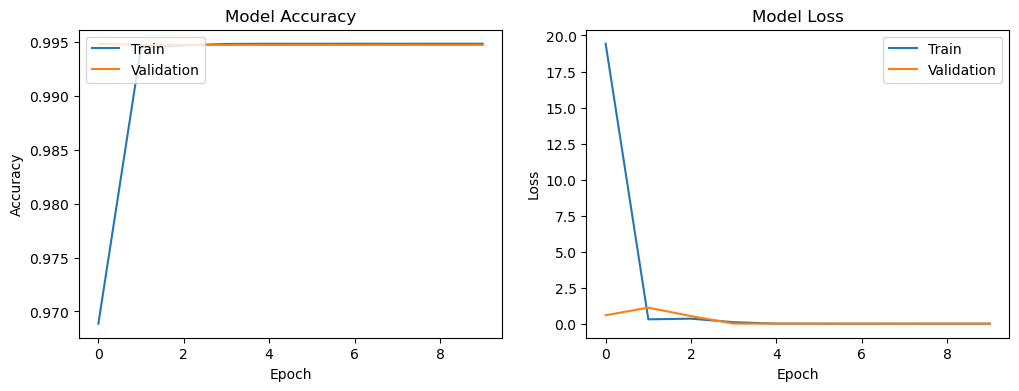

In [39]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


Convulational Neural Network

In [50]:
X_train = X_train.to_numpy()
Y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = y_test.to_numpy()

# Reshape the input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [51]:
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense_15 (Dense)            (None, 16)                4624      
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
____________________________________________________

In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
reduce_lr = ReduceLROnPlateau(patience=3)
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, Y_train, epochs=10, batch_size=512, validation_split=0.2, shuffle=True,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/10
1940/1940 [==============================] - 9s 4ms/step - loss: 24.1819 - accuracy: 0.9904 - val_loss: 36.9136 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 2/10
1940/1940 [==============================] - 9s 5ms/step - loss: 21.1865 - accuracy: 0.9907 - val_loss: 25.1476 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 3/10
1940/1940 [==============================] - 9s 5ms/step - loss: 9.4530 - accuracy: 0.9913 - val_loss: 1.4252 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 4/10
1940/1940 [==============================] - 9s 5ms/step - loss: 9.2327 - accuracy: 0.9920 - val_loss: 0.4127 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 5/10
1940/1940 [==============================] - 9s 4ms/step - loss: 3.4604 - accuracy: 0.9933 - val_loss: 1.0941 - val_accuracy: 0.9238 - lr: 0.0010
Epoch 6/10
1940/1940 [==============================] - 9s 5ms/step - loss: 1.9417 - accuracy: 0.9936 - val_loss: 1.6818 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 7/10
1940/1940 [==============================] 

Performance Plateau after 7th iteration

In [55]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

19103/19103 [==============================] - 15s 788us/step - loss: 0.0243 - accuracy: 0.9948
Test loss: 0.024267327040433884
Test accuracy: 0.9947553873062134


In [56]:
y_pred = model.predict(X_test)


19103/19103 [==============================] - 13s 680us/step


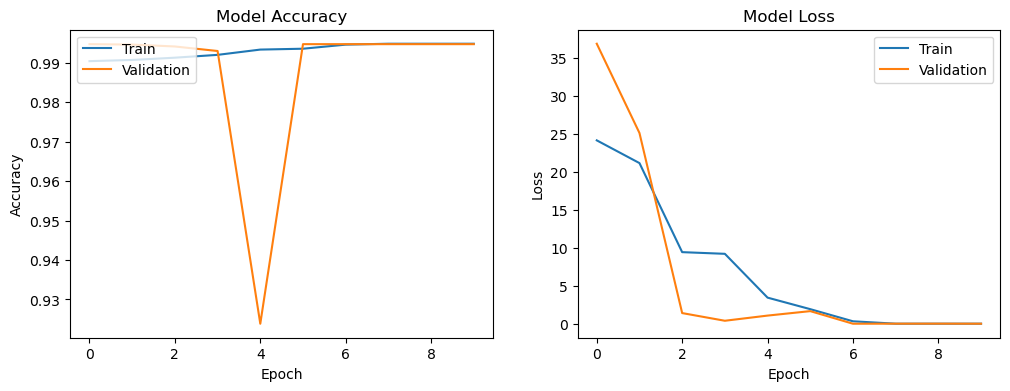

In [57]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

## Conclusion

In conclusion, we experimented with two different neural network architectures, namely feedforward and CNN, for credit card fraud prediction. Both models achieved impressive results, demonstrating their effectiveness in detecting fraudulent transactions.

The CNN model achieved a test loss of 0.024 and a test accuracy of 99.48%. This indicates that the model performed exceptionally well in correctly classifying fraudulent and non-fraudulent transactions, with only a minimal loss and a high level of accuracy.
Similarly, the feedforward model achieved a test loss of 0.031 and a test accuracy of 99.48%. This demonstrates that the feedforward model was also highly effective in predicting credit card fraud, with comparable performance to the CNN model.